In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [5]:
!wget $data -O HW_W4.csv

--2023-10-07 10:06:14--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: 'HW_W4.csv'

     0K .......... .......... .......... .......... ..........  3%  796K 2s
    50K .......... .......... .......... .......... ..........  6% 1,34M 1s
   100K .......... .......... .......... .......... .......... 10% 1,71M 1s
   150K .......... .......... .......... .......... .......... 13% 2,78M 1s
   200K .......... .......... .......... .......... .......... 17% 1,65M 1s
   250K .......... .......... .......... .......... .......... 20% 4,21M 1s
   300K .......... .......... .......... .......... .......... 24% 1,94M 1s
   350K .

In [6]:
df = pd.read_csv('HW_W4.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# DATA PREPARATION

In [7]:
df.columns = df.columns.str.lower().str.replace(' ' , '_')
df.head().T

,0,1,2,3,4
make,BMW,BMW,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series,1 Series,1 Series
year,2011,2011,2011,2011,2011
engine_fuel_type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
driven_wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
number_of_doors,2.0,2.0,2.0,2.0,2.0
market_category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [8]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [10]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [11]:
col = [ 'make', 'model', 'year', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'msrp' 
]

In [12]:
df = df[col]
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [13]:
df['above_average'] = (df.msrp >= df.msrp.mean()).astype(int)
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) #split in train e test, imposto seed=1

In [16]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) #split in train e test, imposto seed=1

In [17]:
len(df_train), len(df_test), len(df_val)

(7148, 2383, 2383)

In [18]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [19]:
y_train = df_train.above_average.values
y_val   = df_val.above_average.values
y_test  = df_test.above_average.values

In [20]:
df_test.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
above_average          int32
dtype: object

In [21]:
def train(df_tr, y_train, C=1.0):
    dicts = df_tr.to_dict(orient='records')
    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [22]:
def predict(df_pred, dv, model):
    dicts = df_pred.to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

# QUESTION 1 

In [24]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
above_average          int32
dtype: object

In [25]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp',
       'above_average'],
      dtype='object')

In [26]:
numerical = ['year', 'engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'msrp']

In [27]:
df_trert = df_train.sort_values('year')

In [28]:
df_trert

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
4591,Plymouth,Horizon,1990,93.0,4.0,MANUAL,4dr Hatchback,31,22,2000,0
3001,Nissan,Axxess,1990,138.0,4.0,MANUAL,Passenger Minivan,24,19,2000,0
1432,Nissan,Axxess,1990,138.0,4.0,AUTOMATIC,Passenger Minivan,22,18,2000,0
206,Cadillac,Brougham,1990,140.0,8.0,AUTOMATIC,Sedan,22,15,2000,0
5290,Oldsmobile,Cutlass Calais,1990,110.0,4.0,MANUAL,Coupe,30,19,2000,0
...,...,...,...,...,...,...,...,...,...,...,...
4735,Hyundai,Elantra,2017,147.0,4.0,AUTOMATIC,Sedan,38,29,18150,0
1028,Nissan,Titan,2017,390.0,8.0,AUTOMATIC,Crew Cab Pickup,21,15,37810,0
6353,Kia,Cadenza,2017,290.0,6.0,AUTOMATIC,Sedan,28,20,44390,1
1510,Audi,S5,2017,333.0,6.0,AUTOMATED_MANUAL,Coupe,28,18,54100,1


In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
for n in ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']:
    df_trert = df_train.sort_values(n)
    print(auc(df_trert[n], df_trert['above_average']).round(3), '--', n)

684.0 -- engine_hp
10.0 -- engine_cylinders
286.5 -- highway_mpg
49.5 -- city_mpg


# QUESTION 2

In [51]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [52]:
dv, model = train(df_train, y_train)

In [53]:
y_pred = predict(df_val, dv, model)

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.9790257223864177

# QUESTION 3

In [55]:
thresholds = np.linspace(0,1,101)
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp) # precision
    r = tp/ (tp + fn) #recall
    
    scores.append((t, p, r))

C:\Users\bergi\AppData\Local\Temp\ipykernel_9912\954774590.py:15: RuntimeWarning: invalid value encountered in long_scalars
  p = tp / (tp + fp) # precision


In [56]:
scores #0.48 intersect

[(0.0, 0.27444397817876626, 1.0),
 (0.01, 0.4611032531824611, 0.9969418960244648),
 (0.02, 0.5070093457943925, 0.9954128440366973),
 (0.03, 0.5406976744186046, 0.9954128440366973),
 (0.04, 0.5701754385964912, 0.9938837920489296),
 (0.05, 0.585058505850585, 0.9938837920489296),
 (0.06, 0.6039142590866728, 0.9908256880733946),
 (0.07, 0.6159695817490495, 0.9908256880733946),
 (0.08, 0.6355599214145383, 0.9892966360856269),
 (0.09, 0.6498993963782697, 0.9877675840978594),
 (0.1, 0.6598360655737705, 0.9847094801223242),
 (0.11, 0.6729559748427673, 0.981651376146789),
 (0.12, 0.6866310160427808, 0.981651376146789),
 (0.13, 0.6968375136314068, 0.9770642201834863),
 (0.14, 0.7085650723025584, 0.9740061162079511),
 (0.15, 0.7256027554535017, 0.9663608562691132),
 (0.16, 0.734192037470726, 0.9587155963302753),
 (0.17, 0.7382075471698113, 0.9571865443425076),
 (0.18, 0.7428571428571429, 0.9541284403669725),
 (0.19, 0.7446300715990454, 0.9541284403669725),
 (0.2, 0.7560679611650486, 0.95259938837

In [57]:
columns = ['threshold', 'p', 'r']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores

,threshold,p,r
0,0.00,0.274444,1.000000
1,0.01,0.461103,0.996942
2,0.02,0.507009,0.995413
3,0.03,0.540698,0.995413
4,0.04,0.570175,0.993884
...,...,...,...
96,0.96,0.996454,0.429664
97,0.97,0.996241,0.405199
98,0.98,1.000000,0.363914
99,0.99,1.000000,0.308869


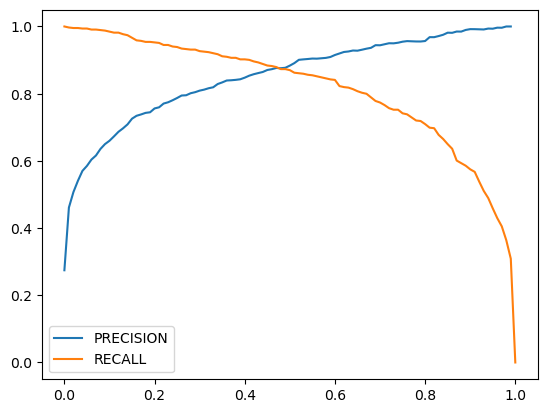

In [58]:
#plt.figure(figsize=(100,20)) # in this way is squerred
plt.plot(df_scores.threshold, df_scores.p, label='PRECISION')
plt.plot(df_scores.threshold, df_scores.r, label='RECALL')
plt.legend()

In [60]:
df_scores[40:60]

,threshold,p,r
40,0.40,0.847701,0.902141
41,0.41,0.853623,0.900612
42,0.42,0.857980,0.896024
43,0.43,0.861357,0.892966
44,0.44,0.864583,0.888379
45,0.45,0.870482,0.883792
46,0.46,0.872920,0.882263
47,0.47,0.876524,0.879205
48,0.48,0.875767,0.873089
49,0.49,0.877112,0.873089


# QUESTION 4

In [61]:
thresholds = np.linspace(0,1,101)
scores_q4 = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp) # precision
    r = tp / (tp + fn) #recall
    
    f1= (((p*r)/(p+r))*2).round(4)
    scores_q4.append((t, f1))

C:\Users\bergi\AppData\Local\Temp\ipykernel_9912\58367782.py:15: RuntimeWarning: invalid value encountered in long_scalars
  p = tp / (tp + fp) # precision


In [62]:
scores_q4

[(0.0, 0.4307),
 (0.01, 0.6306),
 (0.02, 0.6718),
 (0.03, 0.7008),
 (0.04, 0.7246),
 (0.05, 0.7365),
 (0.06, 0.7504),
 (0.07, 0.7597),
 (0.08, 0.7739),
 (0.09, 0.784),
 (0.1, 0.7902),
 (0.11, 0.7985),
 (0.12, 0.8081),
 (0.13, 0.8135),
 (0.14, 0.8203),
 (0.15, 0.8289),
 (0.16, 0.8316),
 (0.17, 0.8336),
 (0.18, 0.8353),
 (0.19, 0.8365),
 (0.2, 0.843),
 (0.21, 0.8445),
 (0.22, 0.8489),
 (0.23, 0.8512),
 (0.24, 0.853),
 (0.25, 0.8563),
 (0.26, 0.8587),
 (0.27, 0.8586),
 (0.28, 0.8614),
 (0.29, 0.8632),
 (0.3, 0.8639),
 (0.31, 0.8649),
 (0.32, 0.8666),
 (0.33, 0.8668),
 (0.34, 0.8708),
 (0.35000000000000003, 0.8707),
 (0.36, 0.8731),
 (0.37, 0.8721),
 (0.38, 0.8727),
 (0.39, 0.8715),
 (0.4, 0.8741),
 (0.41000000000000003, 0.8765),
 (0.42, 0.8766),
 (0.43, 0.8769),
 (0.44, 0.8763),
 (0.45, 0.8771),
 (0.46, 0.8776),
 (0.47000000000000003, 0.8779),
 (0.48, 0.8744),
 (0.49, 0.8751),
 (0.5, 0.8767),
 (0.51, 0.8765),
 (0.52, 0.8804),
 (0.53, 0.8802),
 (0.54, 0.8791),
 (0.55, 0.8789),
 (0.56, 0.87

In [132]:
columns = ['threshold', 'f1']
scores_q4 = pd.DataFrame(scores_q4, columns = columns)
n = scores_q4.idxmax()
scores_q4.f1[n]

100       NaN
52     0.8804
Name: f1, dtype: float64

# QUESTION 5

In [71]:
from sklearn.model_selection import KFold

In [72]:
KFold = KFold(n_splits=5, shuffle=True, random_state=1)

In [73]:
KFold.split(df_full_train)

<generator object _BaseKFold.split at 0x0000022E7392E7A0>

In [74]:
train_idx, val_idx = next(KFold.split(df_full_train))

In [75]:
len(train_idx), len(val_idx), len(df_full_train)

(7624, 1907, 9531)

In [76]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [77]:
!pip install tqdm
from tqdm.auto import tqdm

In [78]:
df_val.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
7155,Lincoln,Navigator,2016,380.0,6.0,AUTOMATIC,4dr SUV,20,15,73645,1
10834,Mazda,Truck,2002,207.0,6.0,MANUAL,Extended Cab Pickup,18,14,22630,0
6887,Lincoln,MKX,2017,303.0,6.0,AUTOMATIC,4dr SUV,25,17,38260,0
6070,Volkswagen,Jetta SportWagen,2013,140.0,4.0,MANUAL,Wagon,42,30,28395,0
3272,Cadillac,CTS,2016,268.0,4.0,AUTOMATIC,Sedan,31,21,56285,1


In [85]:
scoring = []
for train_idx, val_idx in KFold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.above_average.values
    y_val = df_val.above_average.values
    
    del df_train['above_average']
    del df_val['above_average']
    del df_train['msrp']
    del df_val['msrp']
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scoring.append(auc)

In [86]:
scoring

[0.9784547479580893,
 0.977489884329507,
 0.9829931403714238,
 0.9797055378952653,
 0.984038184038184]

In [89]:
np.mean(scoring), np.std(scoring)

(0.9805362989184939, 0.002553543790218258)

In [90]:
#0.003

# QUESTION 6

In [91]:
from sklearn.model_selection import KFold

In [95]:
n_splits = 5

Kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for C in  tqdm([0.01, 0.1, 0.5, 10]):
    scors = []
    
    for train_idx, val_idx in \
       (Kfold.split(df_full_train)):
        df_trainp = df_full_train.iloc[train_idx]
        df_valp = df_full_train.iloc[val_idx]

        y_trainp = df_trainp.above_average.values
        y_valp = df_valp.above_average.values

        del df_trainp['above_average']
        del df_valp['above_average']
        del df_trainp['msrp']
        del df_valp['msrp']
    
        dv, model = train(df_trainp, y_trainp, C=C)
        y_predp = predict(df_valp, dv, model)

        auc_q6 = roc_auc_score(y_valp, y_predp)
        scors.append(auc_q6)
    print('C=%s %.3f +- %.3f' % (C, np.mean(scors), np.std(scors)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.981 +- 0.003
C=0.1 0.981 +- 0.003
C=0.5 0.981 +- 0.003
C=10 0.981 +- 0.003
